In [95]:
import matplotlib
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['font.serif'] = ['Palatino','DejaVu Serif', 'Bitstream Vera Serif', 'New Century Schoolbook', 'Century Schoolbook L', 'Utopia', 'ITC Bookman', 'Bookman', 'Nimbus Roman No9 L', 'Times New Roman', 'Times', 'Charter', 'serif']
matplotlib.rcParams['text.usetex'] = True

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

def formatFig(fig, ax, size=False):
    # Set size of figure
    if size:
        fig.set_size_inches(size[0],size[1])
        
    # Adjust axes maxes
    ax.margins(0)
    xmin, xmax = ax.get_xlim()
    ymin, ymax = ax.get_ylim()
    
    # Move left y-axis and bottom x-axis to center, passing through (0,0)
    ax.spines['left'].set_position(('data',0))
    ax.spines['bottom'].set_position(('data',0))

    # Eliminate upper and right axes
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')

    # Show ticks in the left and lower axes only
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
    # Show ticks at integers only
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    ax.tick_params(axis='both',labelsize='10')
    
    # Label origin
    yticks = [int(y) for y in ax.get_yticks()]
    yticks[yticks.index(0)] = ''
    ax.set_yticklabels(yticks)
    
    xticks = [int(x) for x in ax.get_xticks()]
    xticklabels = ax.get_xticklabels()
    xticklabels[xticks.index(0)].set_horizontalalignment('right')
    xticks[xticks.index(0)] = '0'
    ax.set_xticklabels(xticks)
    
    # Add arrows to axes
    # x-axis arrows
    hlx = (xmax - xmin)/40
    hwx = (ymax - ymin)/30
    ax.arrow(xmax-hlx,0,hlx,0,length_includes_head=True,head_width=hwx,head_length=hlx,color='k')
    ax.arrow(xmin+hlx,0,-hlx,0,length_includes_head=True,head_width=hwx,head_length=hlx,color='k')
    
    # get width and height of axes object to scale arrowheads to match
    dps = fig.dpi_scale_trans.inverted()
    bbox = ax.get_window_extent().transformed(dps)
    width, height = bbox.width, bbox.height
    
    # y-axis arrows
    hly = hlx*(ymax-ymin)/height*width/(xmax-xmin)
    hwy = hwx*(xmax-xmin)/width*height/(ymax-ymin)
    ax.arrow(0,ymax-hly,0,hly,length_includes_head=True,head_width=hwy,head_length=hly,color='k')
    ax.arrow(0,ymin+hly,0,-hly,length_includes_head=True,head_width=hwy,head_length=hly,color='k')
    
    # Label axes
    ax.set_xlabel(r"$x$",horizontalalignment='right', x=1, size=10)
    ax.set_ylabel(r"$y$",horizontalalignment='right', y=1, rotation=0, size=10)
    
    # Show grid
    ax.grid(linestyle='--')
    
    # Set axis to background
    ax.set_axisbelow(True)

def addLine(fig,ax, form, p1,p2=0,p3=0, xlim=(-1,1),ylim=False):
    # Plots lines in slope-intercept, point-slope, or standard form, or vertical lines
    # Slope-intercept: y = m*x + b
    #    form = 'si'
    #    p1 = slope (m)
    #    p2 = intercept (b)
    #    p3 = unused (optional argument, not needed for function call)
    # Point-slope: y - y1 = m*(x - x1)
    #    form = 'ps'
    #    p1 = x-coordinate of point (x1)
    #    p2 = y-coordinate of point (y1)
    #    p3 = slope (m)
    # Standard: A*x + B*y = C
    #    form = 'st'
    #    p1 = x-coefficient (A)
    #    p2 = y-coefficient (B)
    #    p3 = constant (C)
    # Vertical: x = c (Note: xmin, xmax args used for ymin, ymax)
    #    form = 'v'
    #    p1 = constant (c)
    
    x = np.linspace(xlim[0],xlim[1])
    
    plt.figure(fig.number)
    plt.sca(ax)
    
    if form == 'si':
        plt.plot(x, p1*x + p2, 'k')
    elif form == 'ps':
        plt.plot(x, p3*(x - p1) + p2, 'k')
    elif form == 'st':
        plt.plot(x, (p3 - p1*x)/p2, 'k')
    elif form == 'v':
        y = np.linspace(ylim[0],ylim[1])
        plt.plot(p1*np.ones(len(y)), y, 'k')
    
    if ylim:
        ax.set_ylim(ylim)
    
    return fig, ax

def addQuad(fig,ax, form, p1,p2,p3, xlim=(-1,1),ylim=False):
    # Plots quadratic curves in standard, factored, or vertex form
    # Standard: y = a*x^2 + b*x + c
    #    form = 's'
    #    p1 = x^2 coefficient (a)
    #    p2 = x coefficient (b)
    #    p3 = constant (c)
    # Factored: y = a*(x - x1)*(x - x2)
    #    form = 'f'
    #    p1 = x^2 coefficient (a)
    #    p2 = 1st root (x1)
    #    p3 = 2nd root (x2)
    # Vertex: y = a*(x - h)^2 + k
    #    form = 'v'
    #    p1 = x^2 coefficient (a)
    #    p2 = x-coordinate of vertex (h)
    #    p3 = y-coordinate (k)
    
    x = np.linspace(xlim[0],xlim[1])
    
    plt.figure(fig.number)
    plt.sca(ax)
    
    if form == 's':
        plt.plot(x, p1*x**2 + p2*x + p3, 'k')
    elif form == 'f':
        plt.plot(x, p1*(x - p2)*(x - p3), 'k')
    elif form == 'v':
        plt.plot(x, p1*(x - p2)**2 + p3, 'k')
    
    if ylim:
        ax.set_ylim(ylim)
    
    return fig, ax

def addCurve(fig,ax, func, xlim=(-1,1),ylim=False):
    # Plots function (func = lambda x: f(x))
    
    x = np.linspace(xlim[0],xlim[1])
    
    plt.figure(fig.number)
    plt.sca(ax)
    
    plt.plot(x,list(map(func, x)), 'k')
    
    if ylim:
        ax.set_ylim(ylim)
    
    return fig, ax

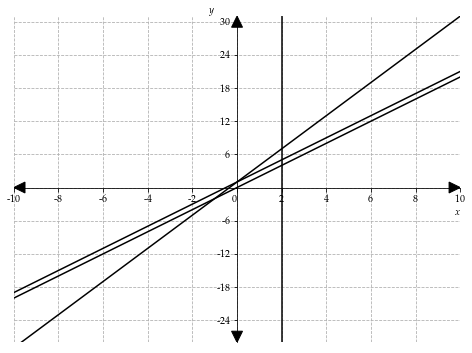

In [96]:
fig, ax = plt.subplots()

addLine(fig,ax, 'si',2,1, xlim=(-10,10));
addLine(fig,ax, 'ps',0,1,3, xlim=(-10,10));
addLine(fig,ax, 'st',-2,1,0, xlim=(-10,10));
addLine(fig,ax, 'v',2, ylim=(-28,31));

formatFig(fig,ax,(8,6));

# fig.savefig("line.pdf", transparent=True, bbox_inches='tight')

plt.show()

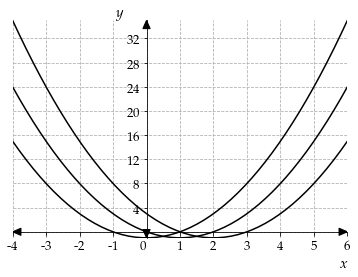

In [3]:
fig, ax = plt.subplots()

addQuad(fig,ax, 's',1,-2,0, xlim=(-4,6));
addQuad(fig,ax, 'f',1,1,3, xlim=(-4,6));
addQuad(fig,ax, 'v',1,0,-1, xlim=(-4,6));

formatFig(fig,ax);

plt.show()

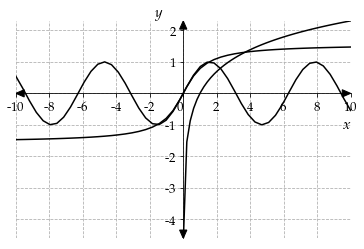

In [4]:
fig, ax = plt.subplots()

addCurve(fig,ax, lambda x: np.sin(x), xlim=(-10,10));
addCurve(fig,ax, lambda x: np.log(x), xlim=(0.01,10));
addCurve(fig,ax, lambda x: np.arctan(x), xlim=(-10,10));

formatFig(fig,ax);

plt.show()

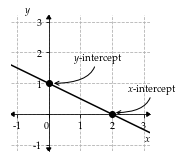

In [100]:
fig, ax = plt.subplots()

plt.scatter([2,0],[0,1],c='k',zorder=1)
ax.annotate(r'$x$-intercept',
            xy=(2.05, 0.05), xycoords='data',
            xytext=(2.5, 0.75), textcoords='data',
            fontsize=10,
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle3,angleA=90,angleB=0"),
            )
ax.annotate(r'$y$-intercept',
            xy=(0.1, 1), xycoords='data',
            xytext=(0.75, 1.75), textcoords='data',
            fontsize=10,
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle3,angleA=90,angleB=0"),
            )
ax.set_xlim((-1.2,3.2))
ax.set_ylim((-1.2,3.2))

addLine(fig,ax, 'st',1,2,2, xlim=(-1.2,3.2));

formatFig(fig,ax,[2.5,2.5]);

fig.savefig("std_form_graph2_2.5.pdf", transparent=True, bbox_inches='tight')


plt.show()

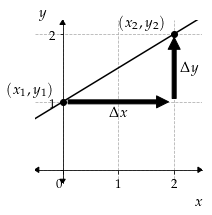

In [6]:
fig, ax = plt.subplots()

addLine(fig,ax,'si',0.5,1, xlim=(-0.5,2.5),ylim=(-0.2,2.2));

plt.scatter([0,2],[1,2],c='k')
ax.text(-0.15,1.15, r'$(x_1,y_1)$',size=15, va='center', ha='right')
ax.text(1.85,2.15, r'$(x_2,y_2)$',size=15, va='center', ha='right')

ax.annotate('', xy=(2, 1), xytext=(0, 1),arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate('', xy=(2, 2), xytext=(2, 1),arrowprops=dict(facecolor='black', shrink=0.05))
ax.text(1,0.85, r'$\Delta x$',size=15, va='center', ha='center')
ax.text(2.1,1.5, r'$\Delta y$',size=15, va='center', ha='left')

formatFig(fig,ax,(3,3));

plt.show()